In [45]:
import geopandas as gpd
import os
import pandas as pd
import openrouteservice
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import contextily as ctx
os.chdir("/home/silas/projects/msc_thesis")

figure_dir = "docs/reports/thesis/figures/"

In [38]:
# import flats dataset with duration to nearest recycling point
flats_duration = gpd.read_file(r'data/derived_data/flats_subset_with_rcp.shp')

#import rcp dataset
rcps = gpd.read_file(r'./data/raw_data/geodata_stadt_Zuerich/recycling_sammelstellen/data/stzh.poi_sammelstelle_view.shp')

# convert crs to 3857
flats_duration = flats_duration.to_crs(epsg=4326)
rcps = rcps.to_crs(epsg=4326)


In [48]:

# load the data


# visualize the results 
# Create a base map
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12)

# Create a colormap for the duration
colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'], vmin=flats_duration['duration'].min(), vmax=flats_duration['duration'].max(), caption='Duration to Closest RCP (minutes)')

# Add flats to the map
for idx, row in flats_duration.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=6,
        color=colormap(row['duration']),
        fill=True,
        fill_color=colormap(row['duration']),
        fill_opacity=0.7,
        popup=f"Flat ID: {row['egid']}<br>Duration: {row['duration']:.2f} min"
    ).add_to(m)

# Add recycling points to the map
for idx, row in rcps.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(color='green', icon='recycle', prefix='fa', ),
        popup=f"RCP ID: {idx}<br>Address: {row['adresse']}", radius=3
    ).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

m.save(figure_dir + 'points_rcp_map.html')
# Display the map
#m

In [56]:

# create a heat map with folium

# Create a base map
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12)


# Create a colormap for the duration
colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'], vmin=flats_duration['duration'].min(), vmax=flats_duration['duration'].max(), caption='Duration to Closest RCP (minutes)')
# Prepare data for heatmap
heat_data = [[row.geometry.y, row.geometry.x, row['duration']] for idx, row in flats_subset_with_rcp.iterrows()]

# Add recycling points to the map
for idx, row in rcps.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        fill=True,
        icon=folium.Icon(color='green', icon='recycle', prefix='fa'),
        fill_opacity=0.7,
        color='red',
        popup=f"RCP ID: {idx}<br>Address: {row['adresse']}"
    ).add_to(m)

# Create and add heatmap to the map
HeatMap(heat_data, radius=15, blur=7, max_zoom=1).add_to(m)

# save the map
m.save(figure_dir + 'heat_map.html')
m




AttributeError: Stamen

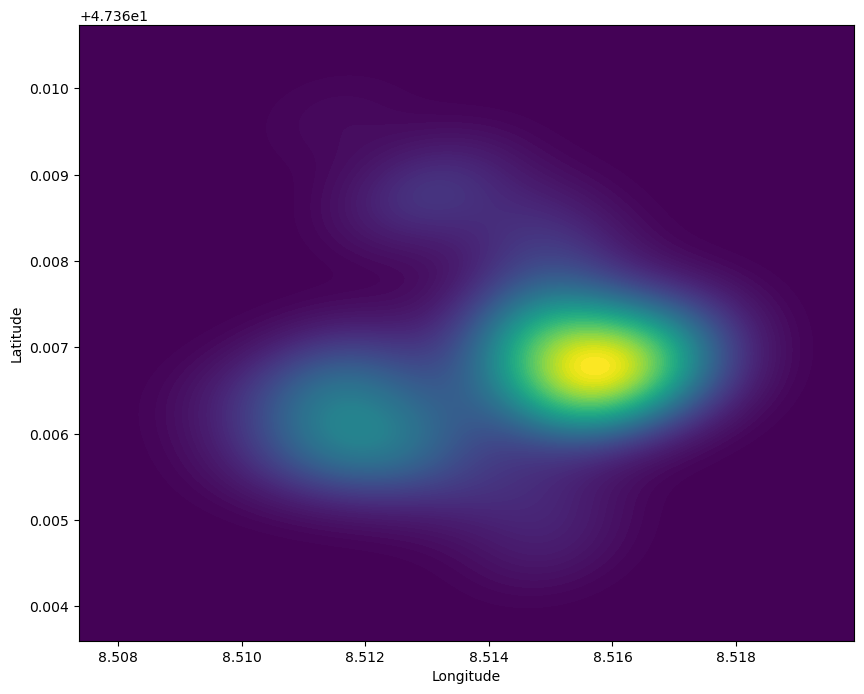

In [ ]:
import seaborn as sns

# Extract the coordinates and duration for the heatmap
heat_data = [[row.geometry.y, row.geometry.x, row['duration']] for idx, row in flats_duration.iterrows()]

# Create a DataFrame for the heatmap
heat_df = pd.DataFrame(heat_data, columns=['Latitude', 'Longitude', 'Duration'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.kdeplot(
    x=heat_df['Longitude'], 
    y=heat_df['Latitude'], 
    weights=heat_df['Duration'], 
    cmap="viridis", 
    fill=True, 
    thresh=0, 
    levels=100,
    ax=ax
)

# Add the basemap
ctx.add_basemap(ax, crs=flats_duration.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Plot the RCPs
rcps.plot(ax=ax, color='green', markersize=10, label='Recycling Collection Points')

# Create the colorbar
cbar = fig.colorbar(ax.collections[0], ax=ax, label='Duration to Closest RCP (minutes)')
ax.set_title('Heatmap of Duration to Closest Recycling Collection Point')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Save the figure
plt.savefig(figure_dir + 'static_heatmap_with_basemap.png', dpi=300)
plt.show()